<b>Data Description:</b>
You  are provided  with a  training set  and  a  test  set  of images  of plant  seedlings  at  various  stages of  grown. Each  image  has  a filename that is its unique id. The dataset comprises 12 plant species. The goal of the competition is to create a classifier capable of determining a plant's species from a photo.

<b>Dataset:</b>
The project is from a dataset from Kaggle. Link to the Kaggle project site:https://www.kaggle.com/c/plant-seedlings-classification/dataNote: For project purposes, download only train images folder from Kaggle.(See note at the end of problem statement.)The dataset has to be downloaded from the above Kaggle website.

<b>Context:</b>
Can you differentiate a weed from a crop seedling? The ability to do so effectively can mean better crop yields and better stewardship of the environment. The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 species at several growth stages

<b>Objective:</b>
To implement the techniques learnt as a part of the course.

<b>Learning Outcomes:</b>
- Pre-processing of image data.
- Visualization of images.
- Building CNN.
- Evaluate the Model.

<b>Steps and tasks:</b>
1. Import the libraries, load dataset, print shape of data, visualize the images in dataset. <b>(5 Marks)</b>


2. Data Pre-processing: <b>(15 Marks)</b>
    - Normalization.
    - Gaussian Blurring.
    - Visualize data after pre-processing.


3. Make data compatible: <b>(10 Marks)</b>
    
    - Split the dataset into training,testing, and validation set. (Hint: First split train images and train labels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5)[Read the note at the end of the problem statement for the reason behind using thetrain images for using for training and testing set.]
    
    - Reshape data into shapes compatible with Keras models.
    
    - Convert labelsfrom digits to one hot vectors.
    
    - Print the label for y_train[0].


4. Building CNN: <b>(15 Marks)</b>
    
    - Define layers.
    
    - Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)


5. Fit and evaluate modeland print confusion matrix. <b>(10 Marks)</b>


6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. <b>(5 Marks)</b>

<b>Note:</b>
- Download the train images from the Kaggle dataset, don’t download the test images.
- As the test dataset is not labeled, so you won’t be able to calculate the accuracy score. So use train images and train labels only to split further into training and testing set during your model building.

### Import the libraries, load dataset, print shape of data, visualize the images in dataset.

In [4]:
# Import libraries, using "walkthrough" notebook as reference
import cv2
import math
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
# files are already unzipped, saving a step in python
path = "./train/*/*.png"                              # The path to all images in training set. (* means include all folders and files.)
files = glob(path)

trainImg = []                                              # Initialize empty list to store the image data as numbers.
trainLabel = []                                            # Initialize empty list to store the labels of images
j = 1
num = len(files)

# Obtain images and resizing, obtain labels
for img in files:
    '''
    Append the image data to trainImg list.
    Append the labels to trainLabel list.
    '''
    print(str(j) + "\\" + str(num), end="\r")
    trainImg.append(cv2.resize(cv2.imread(img), (128, 128)))  # Get image (with resizing to 128x128)
    trainLabel.append(img.split('\\')[-2])  # Get image label (folder name contains the class to which the image belong)
    j += 1

trainImg = np.asarray(trainImg)  # Train images set
trainLabel = pd.DataFrame(trainLabel)  # Train labels set

In [26]:
print(trainImg.shape), print(trainLabel.shape)
print(trainLabel) # make sure labels were properly split from the filepath string

(4750, 128, 128, 3)
(4750, 1)
                0
0     Black-grass
1     Black-grass
2     Black-grass
3     Black-grass
4     Black-grass
5     Black-grass
6     Black-grass
7     Black-grass
8     Black-grass
9     Black-grass
10    Black-grass
11    Black-grass
12    Black-grass
13    Black-grass
14    Black-grass
15    Black-grass
16    Black-grass
17    Black-grass
18    Black-grass
19    Black-grass
20    Black-grass
21    Black-grass
22    Black-grass
23    Black-grass
24    Black-grass
25    Black-grass
26    Black-grass
27    Black-grass
28    Black-grass
29    Black-grass
...           ...
4720   Sugar beet
4721   Sugar beet
4722   Sugar beet
4723   Sugar beet
4724   Sugar beet
4725   Sugar beet
4726   Sugar beet
4727   Sugar beet
4728   Sugar beet
4729   Sugar beet
4730   Sugar beet
4731   Sugar beet
4732   Sugar beet
4733   Sugar beet
4734   Sugar beet
4735   Sugar beet
4736   Sugar beet
4737   Sugar beet
4738   Sugar beet
4739   Sugar beet
4740   Sugar beet
4741   Sugar bee

In [45]:
#create an array of image indexes to reference later and compare visualizations
image_set = np.arange(0, trainImg.shape[0],500)
image_set

array([   0,  500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500])

0
0    Black-grass
Name: 0, dtype: object


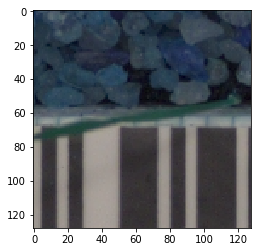

500
0    Charlock
Name: 500, dtype: object


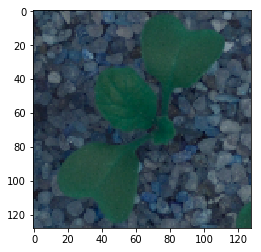

1000
0    Common Chickweed
Name: 1000, dtype: object


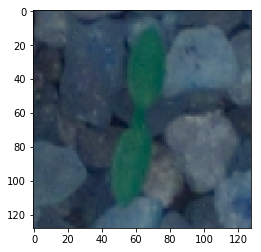

1500
0    Common Chickweed
Name: 1500, dtype: object


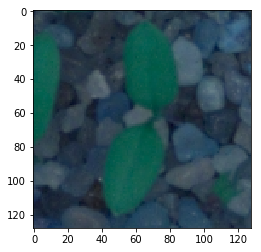

2000
0    Fat Hen
Name: 2000, dtype: object


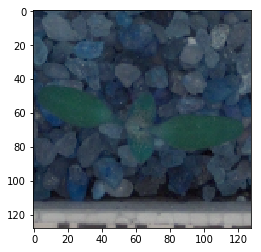

2500
0    Loose Silky-bent
Name: 2500, dtype: object


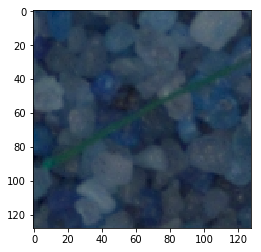

3000
0    Maize
Name: 3000, dtype: object


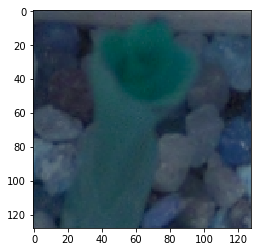

3500
0    Scentless Mayweed
Name: 3500, dtype: object


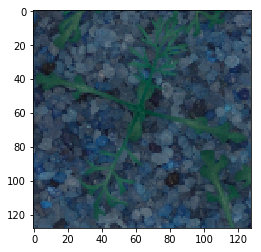

4000
0    Small-flowered Cranesbill
Name: 4000, dtype: object


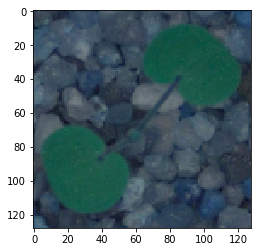

4500
0    Sugar beet
Name: 4500, dtype: object


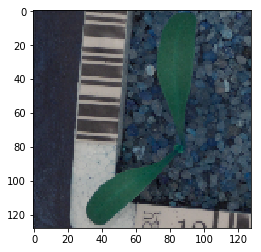

In [47]:
# display the 10 images using the above array, with labels

for i in image_set:
    print(i)
    print(trainLabel.iloc[i])
    plt.imshow(trainImg[i])
    plt.show()
    

### Data Pre Processing

Normalization.
Gaussian Blurring.
Visualize data after pre-processing.

In [54]:
#start with single image, index 0, for testing the code and to examine changes



#normalize the data by dividing by 255 for RGB
normalize_data = trainImg[0]/255
normalize_data

array([[[0.09411765, 0.18431373, 0.30196078],
        [0.12941176, 0.21176471, 0.31764706],
        [0.17647059, 0.25882353, 0.34901961],
        ...,
        [0.21568627, 0.30588235, 0.34509804],
        [0.23529412, 0.3372549 , 0.36862745],
        [0.20392157, 0.3254902 , 0.35294118]],

       [[0.08235294, 0.18039216, 0.30980392],
        [0.14117647, 0.22352941, 0.3372549 ],
        [0.18039216, 0.25882353, 0.35294118],
        ...,
        [0.23137255, 0.30196078, 0.34509804],
        [0.24313725, 0.31764706, 0.36078431],
        [0.22352941, 0.30196078, 0.34901961]],

       [[0.09411765, 0.19215686, 0.32156863],
        [0.12156863, 0.21176471, 0.32941176],
        [0.19607843, 0.27058824, 0.37254902],
        ...,
        [0.22352941, 0.28235294, 0.32941176],
        [0.22745098, 0.28235294, 0.33333333],
        [0.23921569, 0.30196078, 0.34901961]],

       ...,

       [[0.60784314, 0.58431373, 0.56078431],
        [0.61176471, 0.58823529, 0.56470588],
        [0.60392157, 0

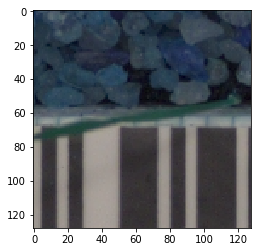

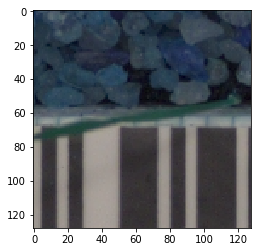

In [60]:
plt.imshow(trainImg[0])
plt.show()
plt.imshow(normalize_data)
plt.show()

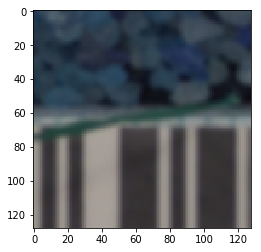

In [64]:
# apply gaussian blur
gaus_blur = cv2.GaussianBlur(normalize_data,(5,5),2)
plt.imshow(gaus_blur)
plt.show()

In [80]:
# apply to all images
norm_trainImg = trainImg / 255
print(norm_trainImg.shape)

(4750, 128, 128, 3)


In [102]:
final_trainImg = []

for i in range(4750):
    a = cv2.GaussianBlur(norm_trainImg[i],(5,5),2)
    final_trainImg.append(a)

final_trainImg = np.asarray(final_trainImg)
final_trainImg.shape

(4750, 128, 128, 3)

### Make Data Compatible

Split the dataset into training,testing, and validation set. (Hint: First split train images and train labels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5)

Reshape data into shapes compatible with Keras models.

Convert labelsfrom digits to one hot vectors.

Print the label for y_train[0].

### Building CNN

Define layers.

Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

### Fit and Evaluate Model and Confusion Matrix

### Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59].